# #Applying framing of 25 ms with an overlapping of 10 ms. Apply hamming window on each frame. Reconstruct the signal and draw the plot.

In [8]:
import scipy.io.wavfile as wavfile
import scipy.signal as signal
import numpy as np
import matplotlib.pyplot as plt



In [9]:
# Load the audio signal from a .wav file
filename = "abc.wav"
sampling_freq, signal_data = wavfile.read(filename)




In [10]:
# Define the window length and overlap in samples
window_length = int(0.025 * sampling_freq)
overlap = int(0.01 * sampling_freq)



In [11]:
# Segment the signal into frames with the given window length and overlap
num_frames = int(np.ceil(len(signal_data) / overlap))
pad_length = num_frames * overlap - len(signal_data)
padded_signal = np.append(signal_data, np.zeros(pad_length))
indices = np.tile(np.arange(0, window_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * overlap, overlap), (window_length, 1)).T
frames = padded_signal[indices.astype(np.int32, copy=False)]



In [14]:
# Apply a Hamming window to each frame
hamming_window = signal.hamming(window_length)
hamming_frames = frames * hamming_window



In [15]:
# Perform the overlap-add reconstruction
reconstructed_signal = np.zeros_like(padded_signal)
for i in range(num_frames):
    start = i * overlap
    end = start + window_length
    reconstructed_signal[start:end] += signal.fftconvolve(hamming_frames[i], hamming_window, mode="same")

# Trim the padding from the reconstructed signal
reconstructed_signal = reconstructed_signal[:len(signal_data)]



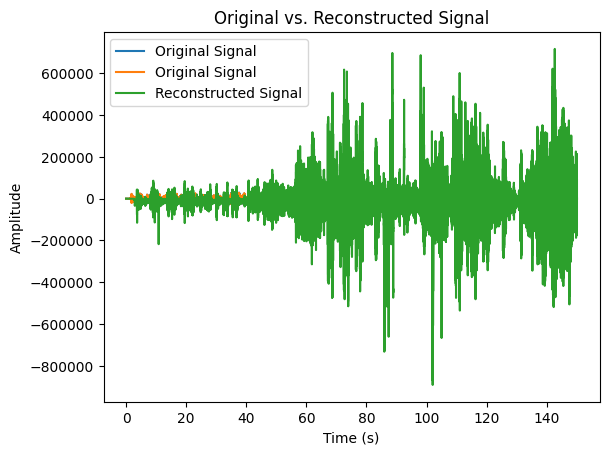

In [16]:
# Plot the original and reconstructed signals
time_vector = np.arange(len(signal_data)) / sampling_freq
plt.plot(time_vector, signal_data, label="Original Signal")
plt.plot(time_vector, reconstructed_signal, label="Reconstructed Signal")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title("Original vs. Reconstructed Signal")
plt.legend()

# Show the plot
plt.show()